**<font color = black size=6>实验四:模型评估</font>**

**<font color = blue size=4>第一部分:数据集划分</font>**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
import random
warnings.filterwarnings('ignore')

<span style="color:purple">给定一个完整的数据集，尚未划分训练集和测试集，我们需要手动实现训练集和测试集的划分:</span>

<span style="color:purple">我们继续使用iris数据集(iris.csv)，这次我们引入了具有4个特征 (花萼长度($x_1$)，花萼宽度 ($x_2$),花瓣长度 ($x_3$),花瓣宽度 ($x_4$))和两个标签 (Setosa，Versicolour)的100个样本数据，其中每类标签的样本占50%。我们需要将其划分为训练集和测试集，其中测试集中的样本数量占总数量的30%(也就是30个)，且测试集中每个标签的样本各占50%</span>

<span style="color:purple">1) 留出法</span>

<span style="color:purple">我们通过随机选择样本的方式将数据分割为训练集和测试集，并保持两种标签的数据的数量一致</span>

In [ ]:
#通过pandas将csv文件转换为dataframe格式后进行操作
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 计算每个类别需要分配给测试集的样本数量的比例，假设为 30%
test_ratio = 0.3

# 计算每个类别需要分配给测试集的样本数量
test_samples_per_class = (labels.value_counts() * test_ratio).astype(int)

# 初始化测试集和训练集
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# 根据标签的分布进行采样
for label, count in test_samples_per_class.items():
    class_samples = df[df['Species'] == label].sample(n=count, random_state=42)
    test_data = test_data.append(class_samples)
    train_data = train_data.append(df[df['Species'] == label].drop(class_samples.index))

# 获取训练集和测试集的特征和标签
train_features = train_data.iloc[:, :-1]
train_labels = train_data.iloc[:, -1]
test_features = test_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1]

# 打印训练集和测试集大小
print("Train data number: ", len(train_data))
print("Test data number: ", len(test_data))

#打印训练集和测试集
print("Train data : ", np.array(train_data))
print("Test data : ", np.array(test_data))

<span style="color:purple">2) 交叉验证法</span>

<span style="color:purple">我们将数据集分割为k个大小相等且标签数量类似的子数据集，每个迭代中选取一个子数据集作为测试集，剩余k-1个组成训练集，并保持两种标签的数据的数量一致</span>

In [ ]:
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 将数据按照标签分为两类
class_0_samples = df[df['Species'] == 0]
class_1_samples = df[df['Species'] == 1]

# 将每一类别的样本随机排序
class_0_samples = class_0_samples.sample(frac=1, random_state=42)
class_1_samples = class_1_samples.sample(frac=1, random_state=42)


# 进行 k 折交叉验证
k = 5

# 初始化训练集和测试集的列表
train_data = []
test_data = []

for i in range(k):
    # 初始化当前折的训练集和测试集
    train_fold = pd.DataFrame()
    test_fold = pd.DataFrame()

    # 计算当前折中每个类别的样本数量
    class_0_fold_size = len(class_0_samples) // k
    class_1_fold_size = len(class_1_samples) // k
    

    # 添加当前折中每个类别的样本到测试集
    test_fold = test_fold.append(class_0_samples[i * class_0_fold_size: (i + 1) * class_0_fold_size])
    test_fold = test_fold.append(class_1_samples[i * class_1_fold_size: (i + 1) * class_1_fold_size])
    
    # 添加剩余样本到训练集
    train_fold = df.drop(test_fold.index)

    # 打乱训练集和测试集的顺序，以便更好的随机性
    train_fold = train_fold.sample(frac=1, random_state=42)
    test_fold = test_fold.sample(frac=1, random_state=42)

    # 将当前折的训练集和测试集添加到列表
    train_data.append(train_fold)
    test_data.append(test_fold)

# 打印每一折的测试集索引，可以看到均为不重复样本
for i in range(k):
    print("第", i+1, "折的测试集: ", (test_data[i].index))

<span style="color:purple">3) 自助法</span>

<span style="color:purple">我们使用有放回采样的方式，每次选取选取一个样本加入到训练集，抽取样本数量(100)次后，将未被选择的样本组成测试集</span>

In [ ]:
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 创建自助样本集
num_samples = df.shape[0]
train_data = []
test_data = []

for i in range(num_samples):
    index = random.randint(0, num_samples-1)
    train_data.append(df.iloc[index])

# 创建测试集（排除训练集中已存在的样本）
for _, row in df.iterrows():
    is_in_train_data = False
    for train_row in train_data:
        if row.equals(train_row):
            is_in_train_data = True
            break
    if not is_in_train_data:
        test_data.append(row)

# 打印训练集和测试集大小
print("训练集大小: ", len(train_data))
print("测试集大小: ", len(test_data))


**<font color = blue size=4>第二部分:性能度量</font>**

<span style="color:purple">1) 回归任务:</span>

<span style="color:purple">均方误差(MSE): 计算模型的预测 $\hat{Y}$ 与真实标签 $Y$ 的接近程度</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\},其中$x_i$为样本$i$的特征值,$y_i$为样本$i$的标签值, $f$为训练的模型,该模型$f$在$D$的均方误差为$$E(f;D) = \frac{1}{m}\sum_{i=1}^{m}{(f(x_i)-y_i)^2}$$

<span style="color:purple">2)分类任务:</span>

<span style="color:purple">2.1)错误率: 分类错误样本占比</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本$i$的预测标签, 该模型$f$在$D$的错误率为$$E(f;D) = \frac{1}{m}\sum_{i=1}^{m}{Ⅱ(f(x_i)\neq y_i)}$$

<span style="color:purple">2.2)精确率: 分类正确样本占比</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本i的预测标签, 该模型$f$在$D$的精度为$$acc(f;D) = \frac{1}{m}\sum_{i=1}^{m}{Ⅱ(f(x_i) = y_i)} = 1 - E(f;D)$$

<span style="color:purple">2.3)查准率和查全率: 正例被预测出来的比率和预测出来的正例中正确的比率</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本i的预测标签.

我们假定该类样本中label为1(正例)和0(反例):

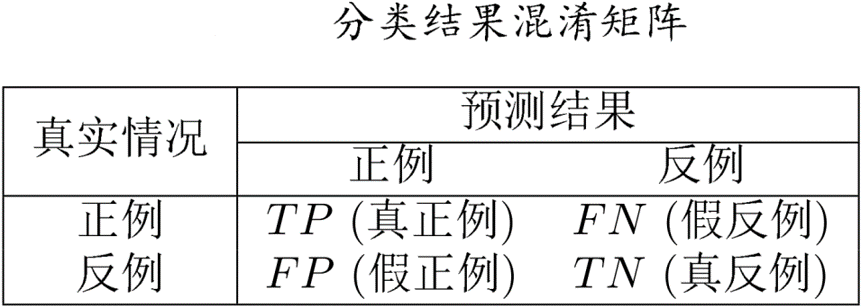

TP(真正例):$$\sum_{i=1}^{m}{Ⅱ(y_i=1 \quad \&\&\quad (f(x_i)= y_i))},$$

FP(假正例):$$\sum_{i=1}^{m}{Ⅱ(y_i=1 \quad \&\&\quad (f(x_i)\neq y_i))},$$

FN(假反例):$$\sum_{i=1}^{m}{Ⅱ(y_i=0 \quad \&\&\quad (f(x_i)\neq y_i))},$$

其中查准率(precision):$$\frac{TP}{TP+FP},$$

查全率(recall):$$\frac{TP}{TP+FN}.$$



<span style="color:purple">2.4)P-R曲线: 根据模型的预测结果按正例可能性大小对样例进行排序，并逐个把样本作为正例进行预测，则可以得到查准率-查全率曲线</span>

计算出所有用户的正例可能性:$P(y=1|x;w)$,并进行排序

从高到低以每个用户的正例可能性为【阈值】，根据$\hat{Y}=1$, if $P(y=1|x;w) \geq 【阈值】$，得到一个坐标点(precision,recall)

记录每个坐标点(precision,recall)的F1度量: $F1 = \frac{2*P*R}{P+R}$

最后将得到的所有(precision,recall)画成折线图

给出一个简易的折线图的画图例子

In [3]:
thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
recall     = [1.00, 0.97, 0.94, 0.92, 0.89, 0.85, 0.82, 0.78, 0.75, 0.70, 0.66, 0.61, 0.57, 0.53, 0.48, 0.41, 0.33, 0.21, 0.01]
precision  = [0.60, 0.65, 0.68, 0.71, 0.74, 0.76, 0.78, 0.80, 0.82, 0.84, 0.86, 0.89, 0.9, 0.91, 0.93, 0.95, 0.96, 0.98, 1.00]


plt.plot(precision,recall, marker='o')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('P-R Curve')
plt.show()

NameError: name 'plt' is not defined

<span style="color:purple">2.5)ROC曲线: 根据模型的预测结果按正例可能性大小对样例进行排序，并逐个把样本作为正例进行预测，得到一组(FPR,TPR)，进而得到ROC曲线</span>

其中$TPR=\frac{TP}{TP+FN}$,$FPR=\frac{FP}{TN+FP}.$

**<font color = blue size=4>第四部分:课堂实验</font>**

我们引入了一个骨科患者的生物力学特征数据集(illness.csv)，每个患者在数据集中由六个生物力学属性表示，这些属性分别为pelvic_incidence（盆腔发病率）、pelvic_tilt numeric（骨盆倾斜）、lumbar_lordosis_angle（腰椎前凸角）、sacral_slope（骶骨斜率）、pelvic_radius（骨盆桡骨）、pelvic_radius（脊椎滑脱分级), 对应的标签则为是否为椎间盘疝气和脊椎滑脱(normal和abnormal).

该数据集共有310个样本，但并没有划分训练集和测试集.

<span style="color:purple">1)导入数据集,根据数据信息定义逻辑回归的模型</span>

In [ ]:
#your code here

<span style="color:purple">2)请分别使用三种数据划分方式(留出法、交叉验证法、自助法)划分出训练集和测试集</span>

In [ ]:
#留出法
#your code here



In [ ]:
#交叉验证法
#your code here


In [ ]:
#自助法
#your code here


<span style="color:purple">3)请分别在三种数据划分方式(留出法、交叉验证法、自助法)所划分出训练集和测试集下训练逻辑回归模型,并测试错误率\精度</span>

In [ ]:
#留出法测试精度
#your code here




In [ ]:
#交叉验证法
#your code here
#每次选用一个子集作为测试集，剩余k-1个子集的并集作为训练集，所以需要每轮都进行测试
#可以使用k个轮次的精度的平均精度作为本方法的最终精度




In [ ]:
#自助法测试精度


<span style="color:purple">4)按照错误率\精度的性能指标判断出性能【最好】和性能【最差】的数据划分方式</span>

In [ ]:
#your code here
print("留出法精度:")
print("交叉验证法平均精度:")
print("自助法精度:")

<span style="color:purple">5)在【留出法】和【自助法】中选出性能更好的数据划分方式，画出其对应的P-R曲线和ROC曲线,并计算各个点的F1度量</span>

In [ ]:
#your code here
#选择一种数据划分方法



In [ ]:
#your code here
#画出P-R曲线




In [ ]:
#your code here
#画出ROC曲线





**<font color = blue size=4>第五部分:作业提交</font>**

<span style="color:purple">1) 实验报告提交地址 (格式: 学号+姓名+实验四): https://send2me.cn/4-3oEngJ/Qp-icPERnYPjPQ ,
    下周因为国庆假期所以实验课不上，本次实验报告的截止日期为10.8 14:20</span>

<span style="color:purple">2) 实验课件获取地址: https://www.jianguoyun.com/p/Dae3tZUQp5WhChiClp0FIAA</span>